In [6]:
#Importing required libraries

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [7]:
#Import the pokemon dataset into a pandas dataframe. The dataset csv file should be in the same folder as the notebbok.

dataset = pd.read_csv('Pokemon.csv', index_col=0) 
# The index_col = 0 simply means that we will treat the first column in the dataset as the ID column.

In [8]:
dataset.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


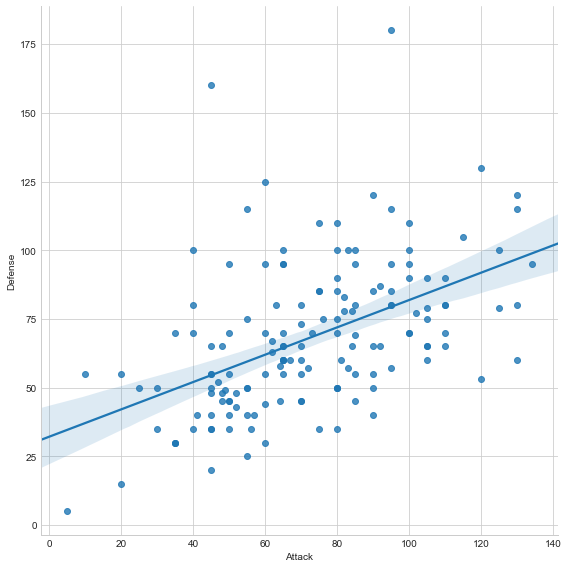

In [23]:
# 1. Default Scatter Plot 

sns.set_style(style="whitegrid") # Produces the background grid. Other options are 
                                 # darkgrid, dark, white, ticks. 

sns.lmplot(x='Attack',y='Defense',data=dataset,size=8)

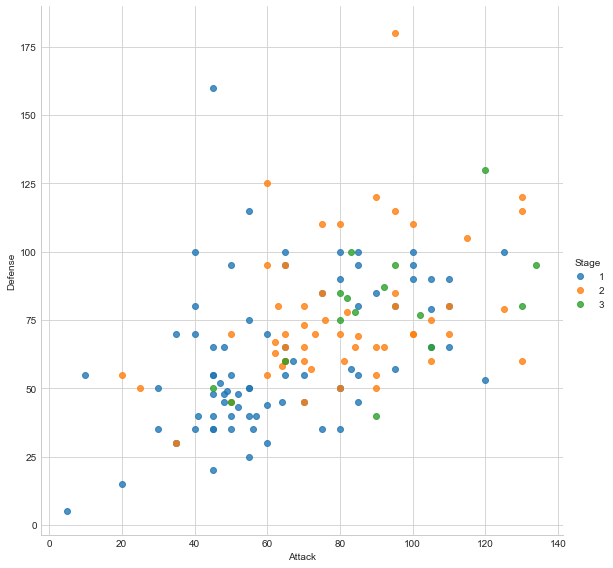

In [17]:
# Scatterplot Arguments
sns.lmplot(x='Attack', y='Defense', data=dataset, 
           fit_reg=False, # No regression line
           hue='Stage', # Color by evolution stage
           size=8)

(0, 189.7475432989191)

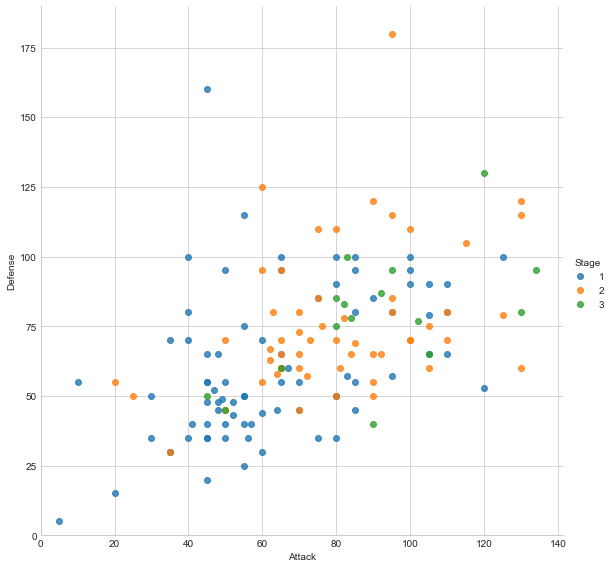

In [22]:
'''
As we can see in thr above chart , we don't have axis limits, the x and y axis go below 0. To set
proper axis limit we use matplotlib.

Remember, Seaborn is a high-level interface to Matplotlib. From our experience, Seaborn will get you most of the way there, but you'll sometimes need to bring in Matplotlib.

Setting your axes limits is one of those times, but the process is pretty simple:

First, invoke your Seaborn plotting function as normal.

Then, invoke Matplotlib's customization functions. In this case, we'll use its 
ylim() and xlim() functions.

For more information about matplotlib plotting , see the documentation here :
https://matplotlib.org/users/pyplot_tutorial.html

'''

sns.lmplot(x='Attack', y='Defense', data=dataset, fit_reg=False, hue='Stage', size=8)
plt.xlim(0, None) # (min, max)
plt.ylim(0, None)

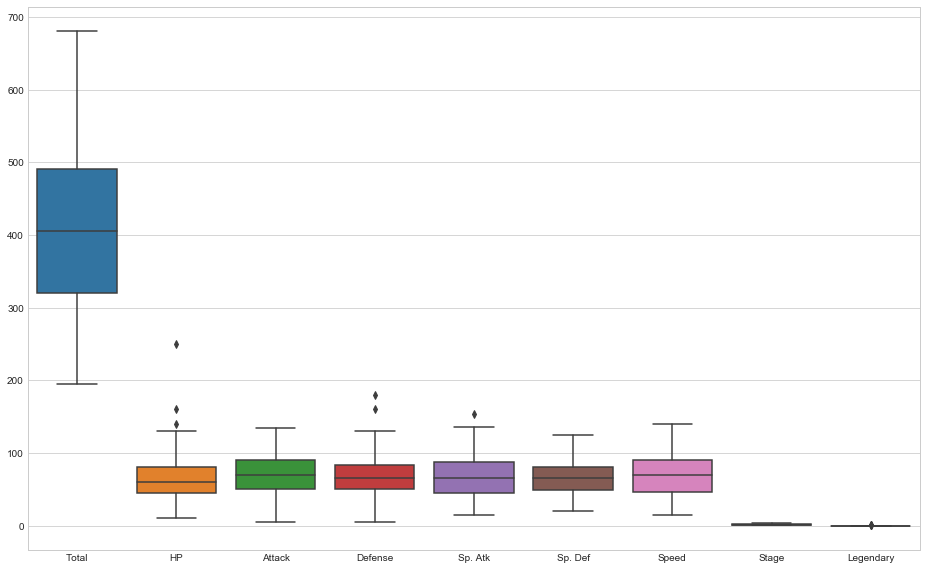

In [26]:
# BoxPlot

'''
How to read boxplots :
https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/descriptive-statistics/box-plot/


'''

plt.figure(figsize=(16,10)) # To set the size of the boxplot, boxplot doesn't have a size argument.
sns.boxplot(data=dataset)

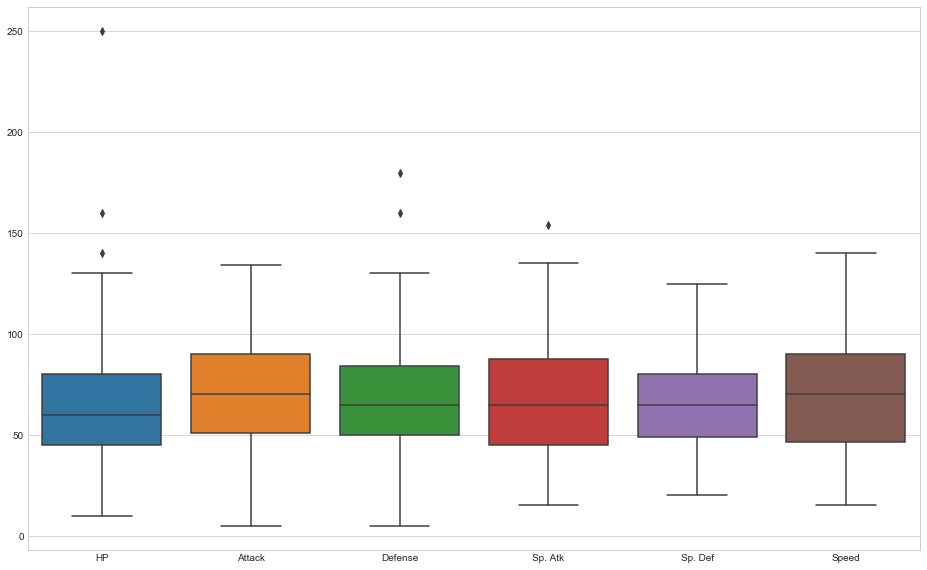

In [28]:
"""
Well, that's a reasonable start, but there are some columns we'd probably like to remove:

We can remove the Total since we have individual stats.
We can remove the Stage and Legendary columns because they aren't combat stats.
In turns out that this isn't easy to do within Seaborn alone. Instead, it's much simpler to pre-format your DataFrame.

Let's create a new DataFrame called stats_df that only keeps the stats columns:
"""

stats_df = dataset.drop(['Total', 'Stage', 'Legendary'], axis=1)

# Pandas cheatsheet : http://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

plt.figure(figsize=(16,10))
sns.boxplot(data=stats_df)

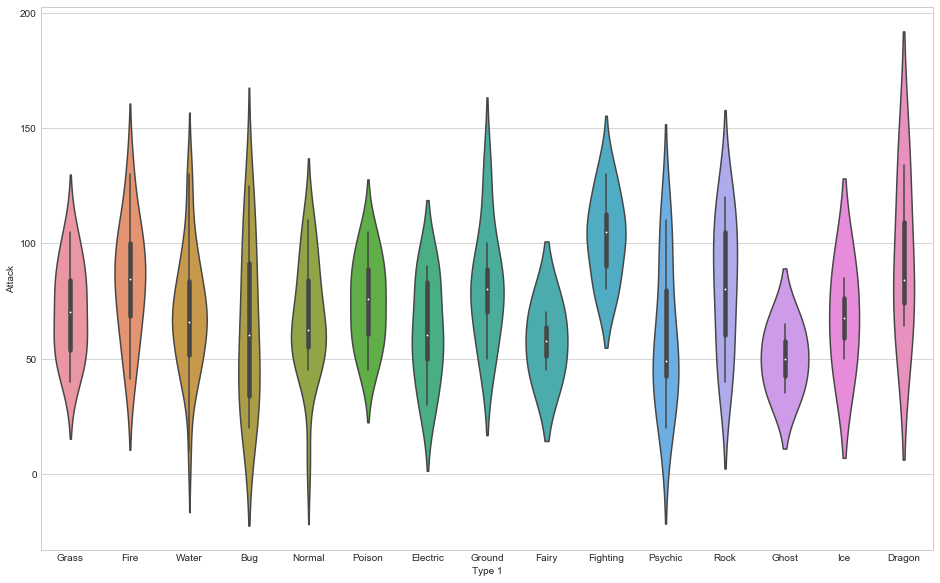

In [31]:
# ViolinPlot 
# https://mode.com/blog/violin-plot-examples

plt.figure(figsize=(16,10))
sns.violinplot(x='Type 1', y='Attack', data=dataset)

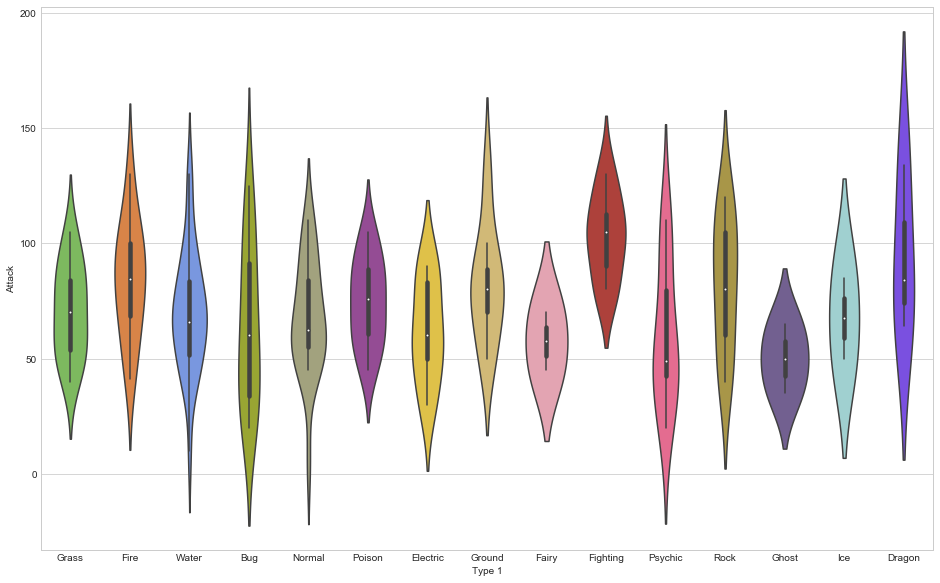

In [32]:
# Setting custom colors for different types
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

plt.figure(figsize=(16,10))
sns.violinplot(x='Type 1', y='Attack', data=dataset, palette=pkmn_type_colors)

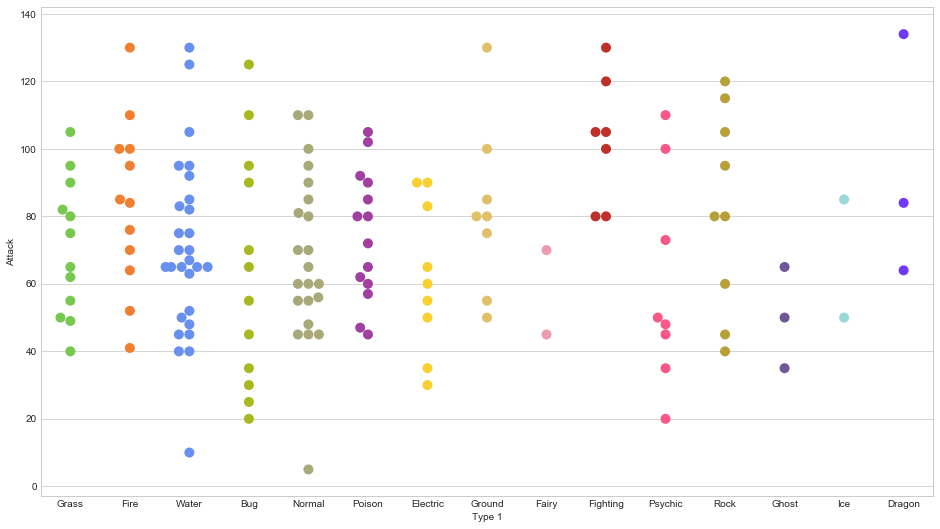

In [39]:
# SwarmPlot
# This visualization will show each point, while "stacking" those with similar values:

plt.figure(figsize=(16,9))
sns.swarmplot(x='Type 1', y='Attack', data=dataset, palette=pkmn_type_colors, size=10)

Text(0.5, 1.0, 'Attack by Type')

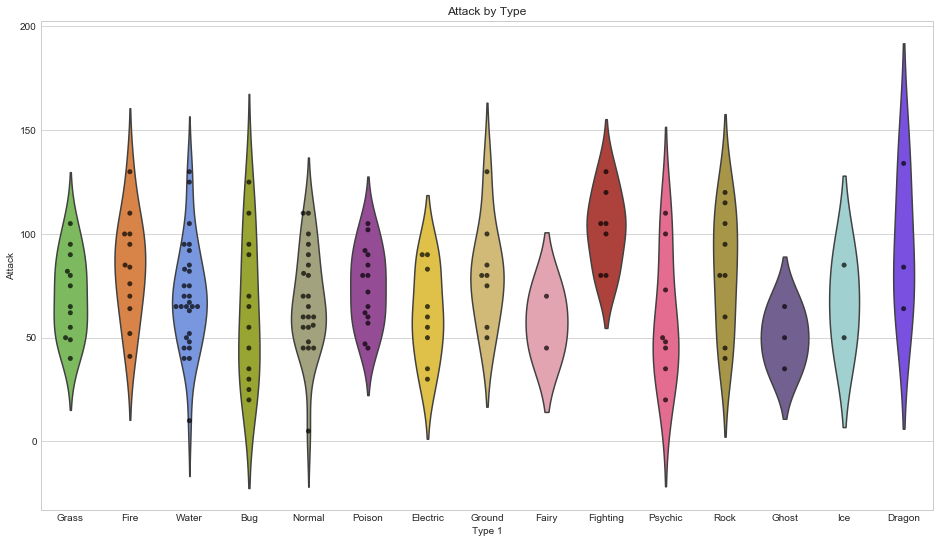

In [47]:
# Overlaying Plots
'''
Combining Violin and Swarm Plots.

It's pretty straightforward to overlay plots using Seaborn, and it works the same way as 
with Matplotlib. Here's what we'll do:

First, we'll make our figure larger using Matplotlib.
Then, we'll plot the violin plot. However, we'll set inner=None to remove the bars inside the violins.
Next, we'll plot the swarm plot. This time, we'll make the points black so they pop out more.
Finally, we'll set a title using Matplotlib.

'''

# Set figure size with matplotlib
plt.figure(figsize=(16,9))

#Violin Plot

sns.violinplot(x='Type 1', y='Attack', data=dataset,
              inner=None, # Removes the bars inside the violins
              palette=pkmn_type_colors,
              size = 10)

# SwarmPlot

sns.swarmplot(x='Type 1', y='Attack', data=dataset, 
              color='k', #Make points black
             alpha=0.7 ) # make them slightly transperent

# Set title 
plt.title('Attack by Type')

In [48]:
# COMBINING ALL THE STATS INTO ONE PLOT

'''
To put all the stats into one plot first we have to do some data wrangling.
'''

# Current data
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [49]:
'''
As we can see , we have different columns for differnet stats. To show all the stats in one plot we have to 
make the stats a key value pair, this can be done using melt function in pandas.

Pandas's melt() function takes 3 arguments:

First, the DataFrame to melt.
Second, ID variables to keep (Pandas will melt all of the other ones).
Finally, a name for the new, melted variable.

'''

melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # variables to keep
                   var_name ="Stat" #Name of melted variable
                   )
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [50]:
'''
All 6 of the stat columns have been "melted" into one, and the new Stat column indicates the original stat (HP, Attack, Defense, Sp. Attack, Sp. Defense, or Speed). For example, it's hard to see here, but Bulbasaur now has 6 rows of data.

In fact, if you print the shape of these two DataFrames...
'''
print( stats_df.shape )
print( melted_df.shape )

(151, 9)
(906, 5)


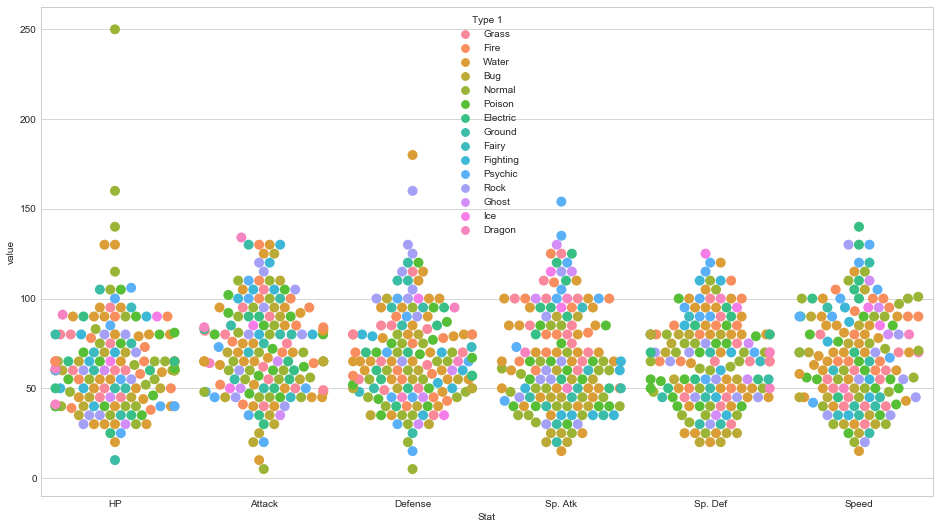

In [53]:
#Plotting all the stats using swarmplot

plt.figure(figsize=(16,9))
sns.swarmplot(x='Stat', y='value', data=melted_df, hue='Type 1' , size=10)

C:\Users\bharg\Anaconda3\lib\site-packages\seaborn\categorical.py:2783: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


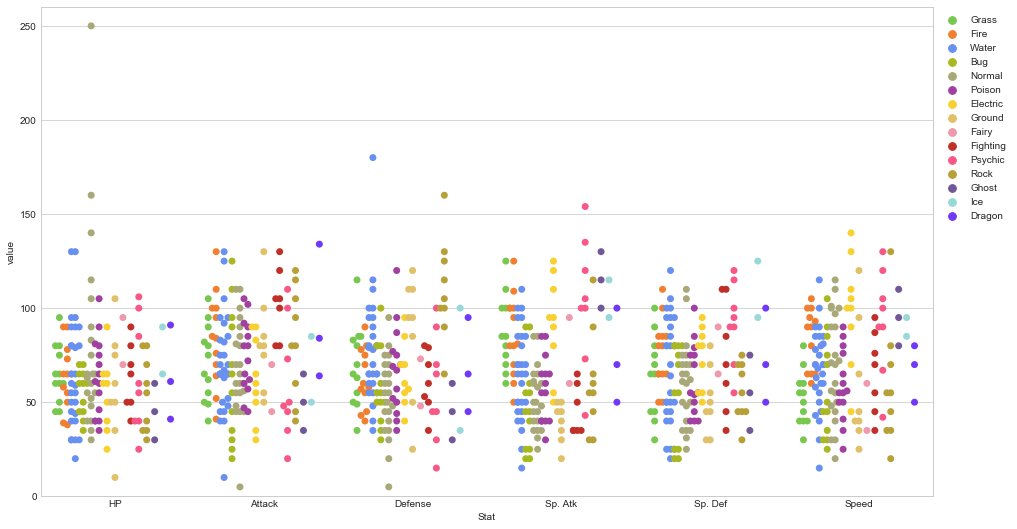

In [57]:
# Making the plot a little more readable

# Enalarge the plot

plt.figure(figsize=(16,9))

# SwarmPlot 

sns.swarmplot(x='Stat', y='value', data=melted_df, hue='Type 1', split=True, size=7, palette=pkmn_type_colors)

# Adjust the y-axis

plt.ylim(0,260)

#Place legend to the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

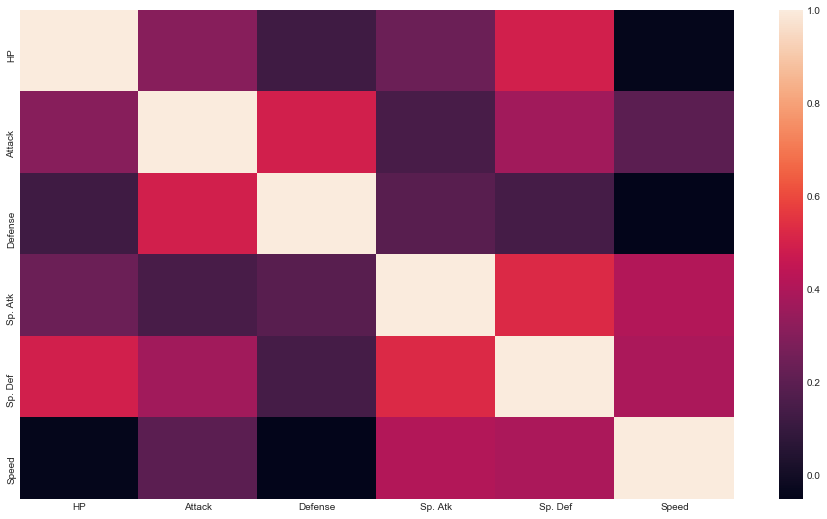

In [60]:
# HeatMap

# calculate correlations

corr = stats_df.corr()

#heatmap
plt.figure(figsize=(16,9))
sns.heatmap(corr)

C:\Users\bharg\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


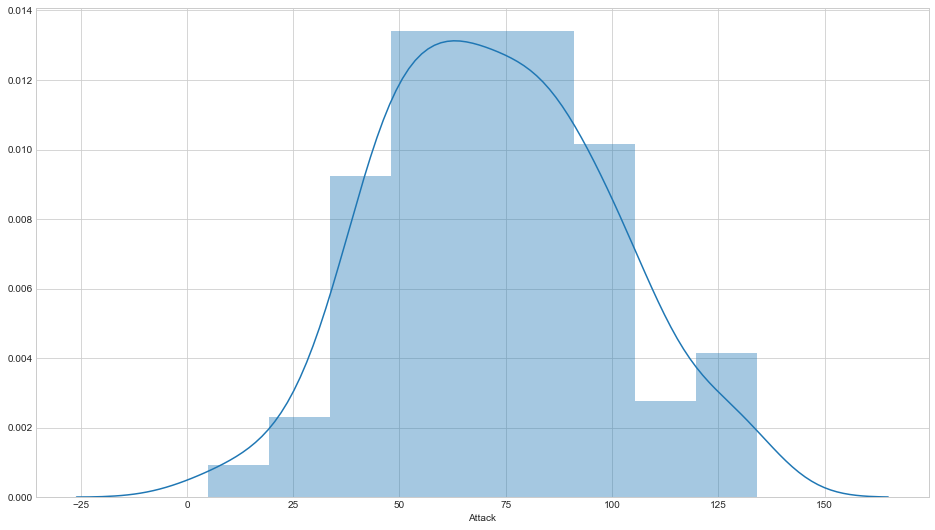

In [61]:
#Histogram
plt.figure(figsize=(16,9))
sns.distplot(dataset.Attack)

(array([ 0.,  5., 10., 15., 20., 25., 30.]),
 <a list of 7 Text yticklabel objects>)

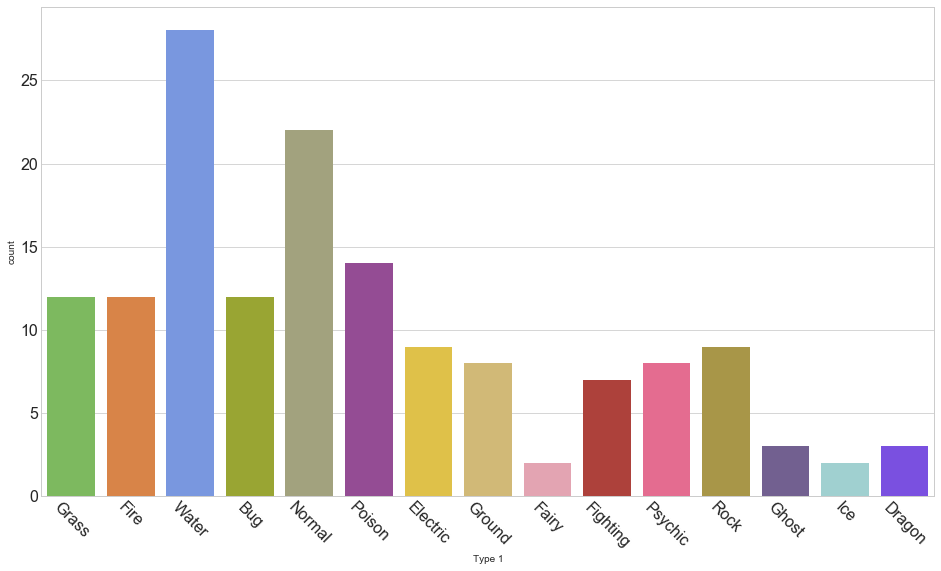

In [71]:
# Bar-plot :
# Count Plot (a.k.a. Bar Plot)
plt.figure(figsize=(16,9))
sns.countplot(x='Type 1', data=dataset, palette=pkmn_type_colors)

# Rotate x-labels and increase size
plt.xticks(rotation=-45, size=16)
plt.yticks( size=16)

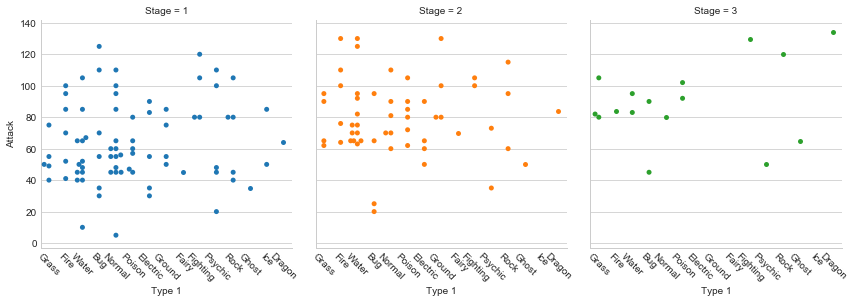

In [74]:
# Factor plot  :Factor plots make it easy to separate plots by categorical classes.

g = sns.factorplot(x='Type 1',
                  y='Attack',
                  data = dataset,
                  hue='Stage', # Color by stage
                  col='Stage', # Separate by stage
                  kind='swarm') # Swarmplot

g.set_xticklabels(rotation=-45)

(array([-50.,   0.,  50., 100., 150., 200., 250.]),
 <a list of 7 Text yticklabel objects>)

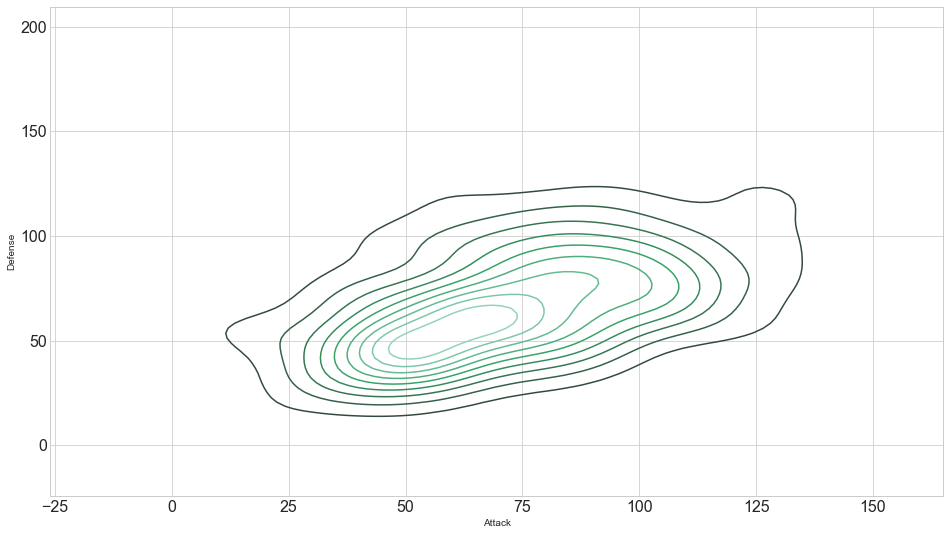

In [78]:
# Density Plot : Density plots display the distribution between two variables.
plt.figure(figsize=(16,9))
sns.kdeplot(dataset.Attack, dataset.Defense)
plt.xticks(size=16)
plt.yticks( size=16)

C:\Users\bharg\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\bharg\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


<Figure size 1152x648 with 0 Axes>

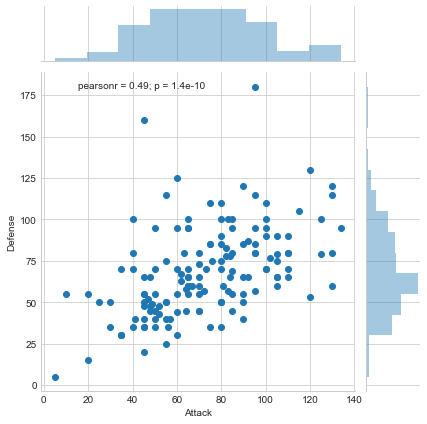

<Figure size 1152x648 with 0 Axes>

In [81]:
# Joint Distribution Plot : Joint distribution plots combine information from scatter plots and histograms to give you 
# detailed information for bi-variate distributions.

sns.jointplot(x='Attack', y='Defense', data=dataset)

plt.figure(figsize=(16,9))